### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-15,412531,4066587,608424,538942,235740,128864,127840,143657,111619,91346,81084,114833,86592,4848,194845
2021-07-16,413091,4075288,608815,540398,236015,128913,127851,144446,111641,91367,81096,115333,86791,4848,194935
2021-07-17,413609,4082335,608884,541266,236240,128960,127864,145222,111657,91369,81096,115831,86966,4848,195047
2021-07-18,414108,4088865,609019,542214,236331,128988,127867,145975,111662,91370,81096,116307,87161,4848,195047
2021-07-19,414482,4096141,609231,542756,236469,129007,127874,146686,111682,91404,81119,116753,87374,4848,195243


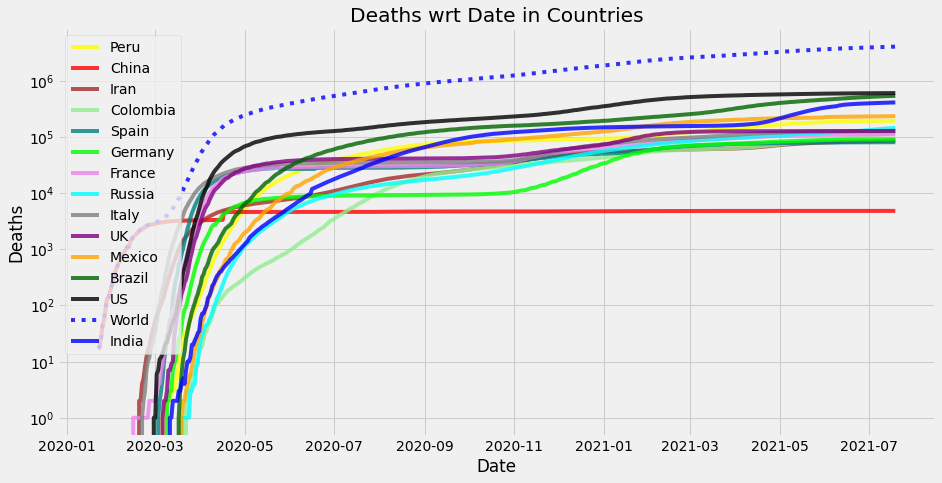

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-15,38949,569387,28412,52789,12821,48641,2473,24793,11058,1444,27688,18070,23655,36,2260
2021-07-16,38079,599949,79310,45591,12420,51949,2895,25188,10995,1565,31060,17893,21885,31,2032
2021-07-17,41157,472593,12960,34339,12631,54183,3118,24590,10949,1309,0,19925,15139,33,1950
2021-07-18,38164,419894,12048,34126,4438,47848,3126,24480,12532,983,0,18206,22184,33,0
2021-07-19,30093,497608,52111,15271,5307,40671,2070,24098,4193,984,61628,16455,25441,65,2320


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-15,55911,439357,19487,52467,6405,26254,1475,21201,3672,1271,14135,23921,15529,26,2627
2021-07-16,54722,450063,23476,52008,6806,27967,1569,21467,4160,1291,15264,23519,15952,26,2587
2021-07-17,53818,451565,22774,50830,7195,29715,1673,21675,4613,1292,14246,23279,15898,27,2544
2021-07-18,52774,449453,22059,49717,7011,30923,1769,21862,5141,1271,13296,22941,16317,27,2375
2021-07-19,51262,452664,24063,47420,6897,31573,1789,22011,5078,1252,16518,22509,16925,30,2371


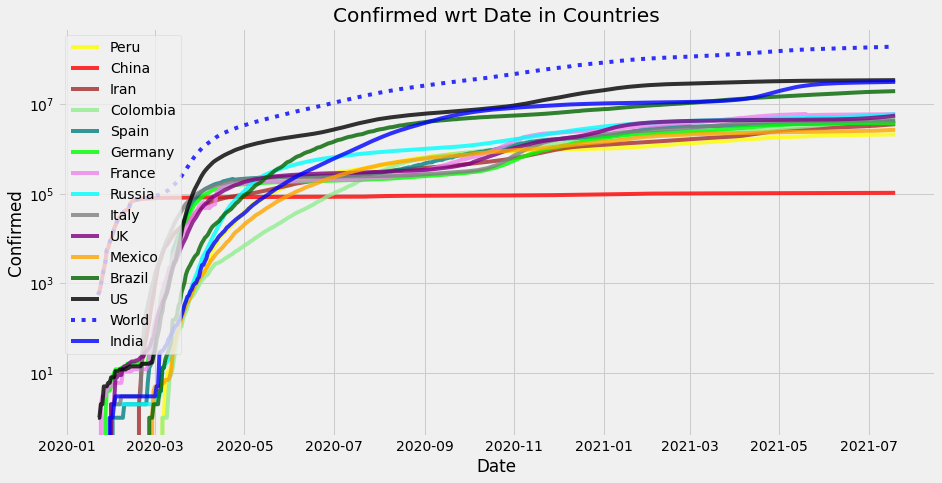

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-15,542,8449,283,1548,233,67,9,780,10,20,41,496,201,0,93
2021-07-16,560,8701,391,1456,275,49,11,789,22,21,12,500,199,0,90
2021-07-17,518,7047,69,868,225,47,13,776,16,2,0,498,175,0,112
2021-07-18,499,6530,135,948,91,28,3,753,5,1,0,476,195,0,0
2021-07-19,374,7276,212,542,138,19,7,711,20,34,23,446,213,0,196


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-15,945.02,8140.07,260.90,1400.89,187.84,33.62,19.20,707.52,25.08,29.65,16.75,564.36,161.55,0.05,169.83
2021-07-16,896.89,8210.19,277.16,1407.78,198.74,35.54,18.18,717.70,24.69,28.56,16.15,556.32,166.23,0.04,159.85
2021-07-17,849.53,8064.79,251.14,1340.31,202.02,36.97,17.53,724.99,23.61,25.24,14.13,549.03,167.33,0.04,153.87
2021-07-18,805.72,7872.94,236.62,1291.27,188.14,35.85,15.71,728.49,21.28,22.21,12.37,539.90,170.79,0.03,134.64
2021-07-19,751.75,7798.32,233.54,1197.61,181.87,33.75,14.62,726.30,21.12,23.69,13.70,528.16,176.06,0.03,142.31


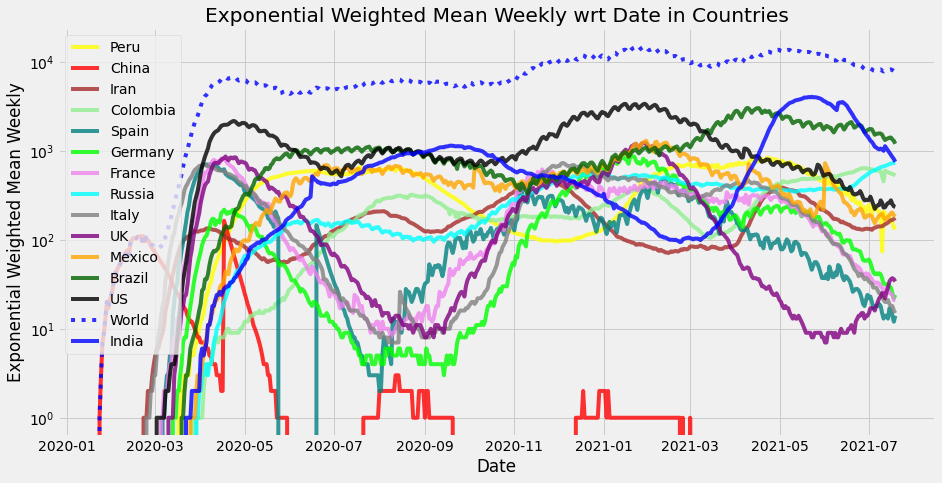

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

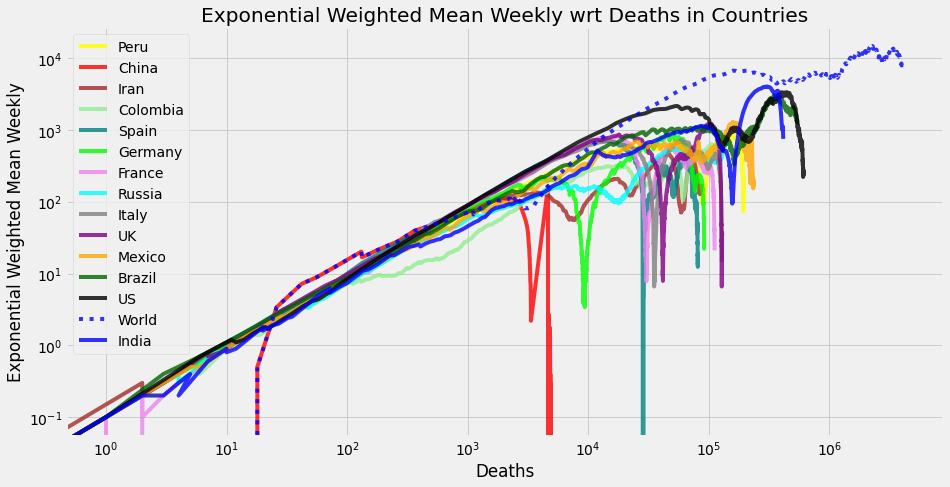

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

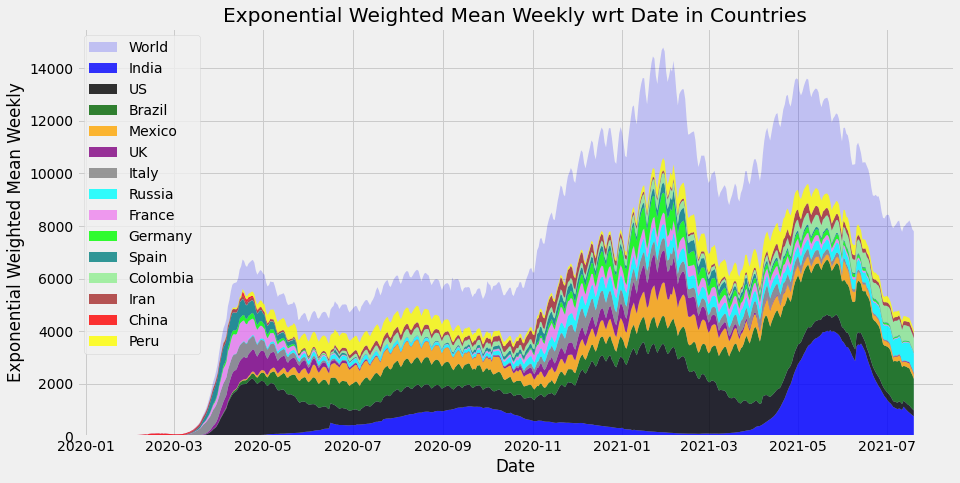

In [20]:
stackplotter(AVG, name)

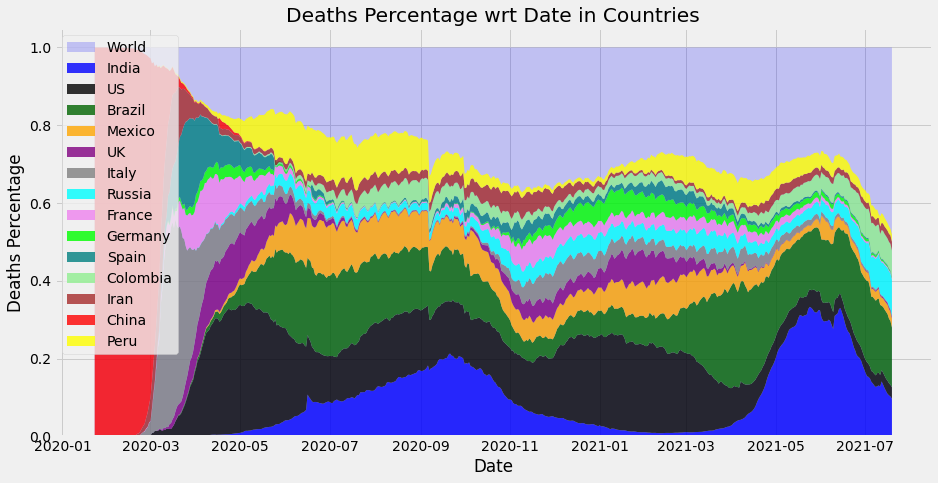

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

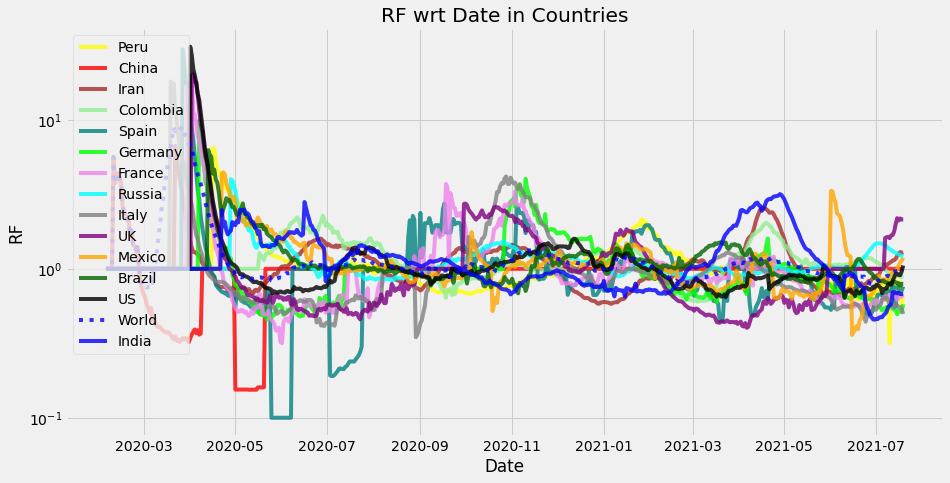

In [23]:
plotter(Reproductivity, 'RF')

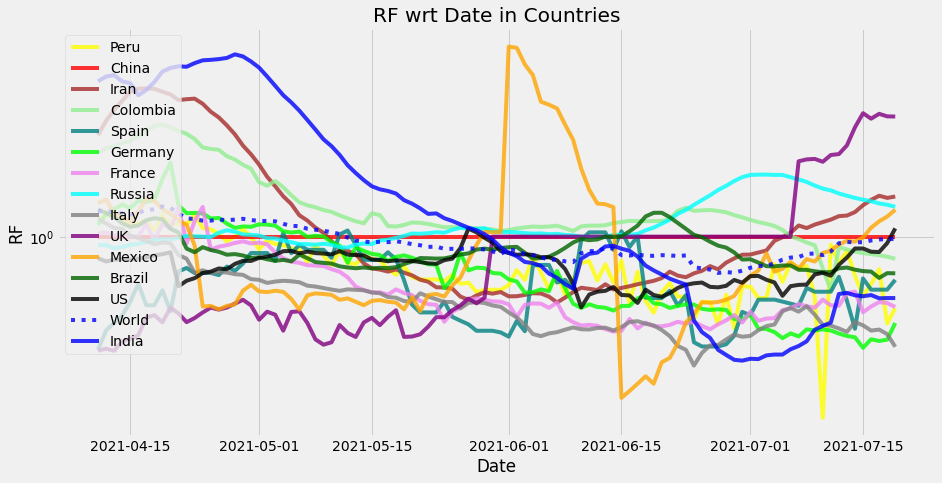

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

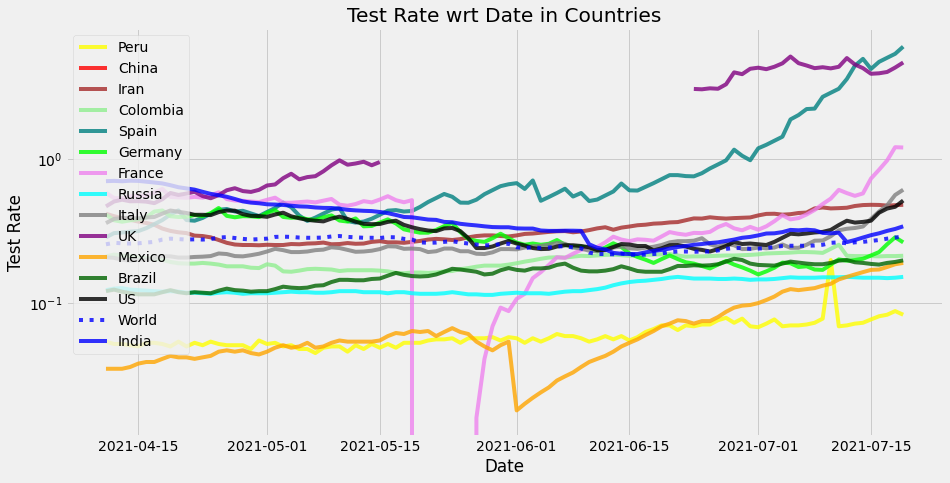

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

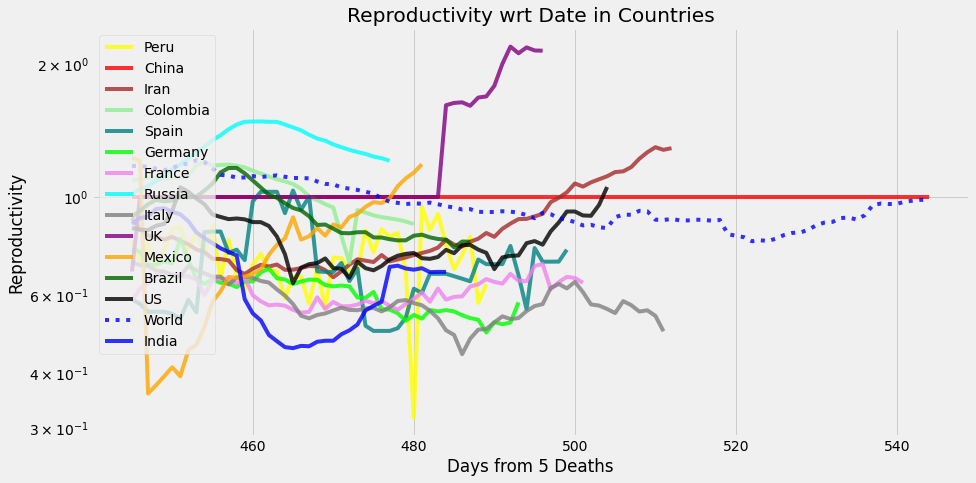

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

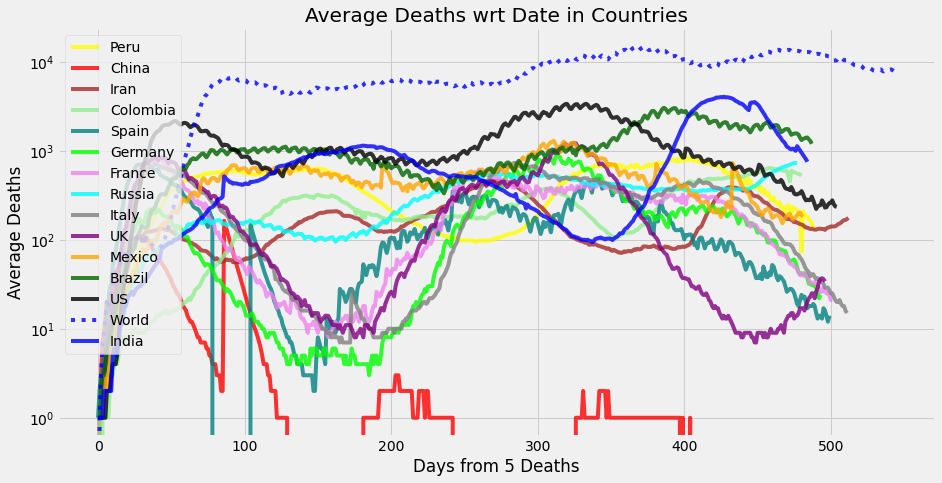

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

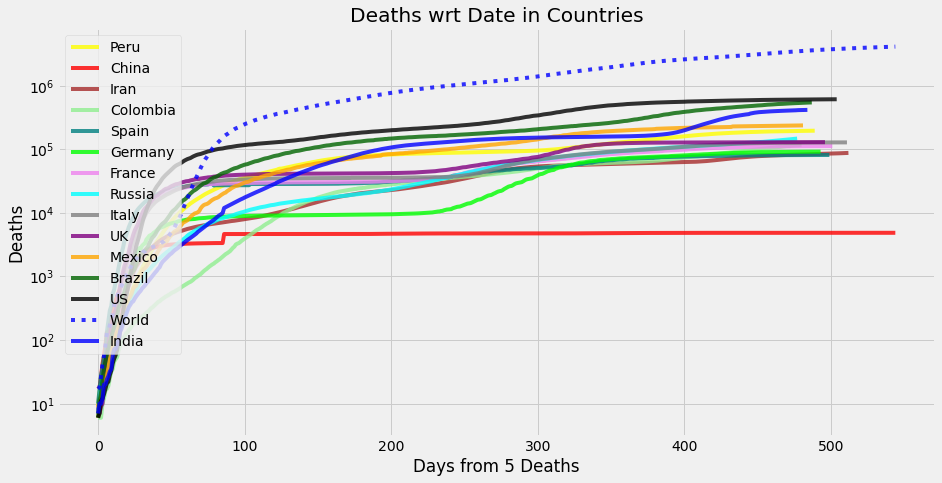

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4096141,7276,7855.57,7798.32,0.9844,190915813,0.290,452664,819.23
US,609231,212,253.57,233.54,1.0534,34132071,0.515,24063,121.85
Brazil,542756,542,1217.57,1197.61,0.7925,19391845,0.198,47420,108.55
India,414482,374,528.29,751.75,0.6773,31174322,0.341,51262,82.90
Mexico,236469,138,201.57,181.87,1.1860,2664444,0.190,6897,47.29
Peru,195243,196,107.86,142.31,0.6350,2094445,0.083,2371,39.05
Russia,146686,711,764.43,726.30,1.2084,5908691,0.152,22011,29.34
UK,129007,19,44.29,33.75,2.1415,5495947,4.677,31573,25.80
Italy,127874,7,12.29,14.62,0.4974,4289528,0.612,1789,25.57


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4096141,7276,7855.57,7798.32,0.9844,190915813,0.290,452664,819.23
Brazil,542756,542,1217.57,1197.61,0.7925,19391845,0.198,47420,108.55
Indonesia,74920,1338,1080.71,957.94,2.1609,2911733,0.177,33953,14.98
Russia,146686,711,764.43,726.30,1.2084,5908691,0.152,22011,29.34
India,414482,374,528.29,751.75,0.6773,31174322,0.341,51262,82.90
Colombia,116753,446,488.29,528.16,0.8689,4655921,0.213,22509,23.35
Argentina,101955,406,385.71,387.81,0.8042,4769142,0.219,16976,20.39
South Africa,67080,221,367.29,312.90,1.2884,2302304,0.236,14755,13.42
US,609231,212,253.57,233.54,1.0534,34132071,0.515,24063,121.85


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4096141


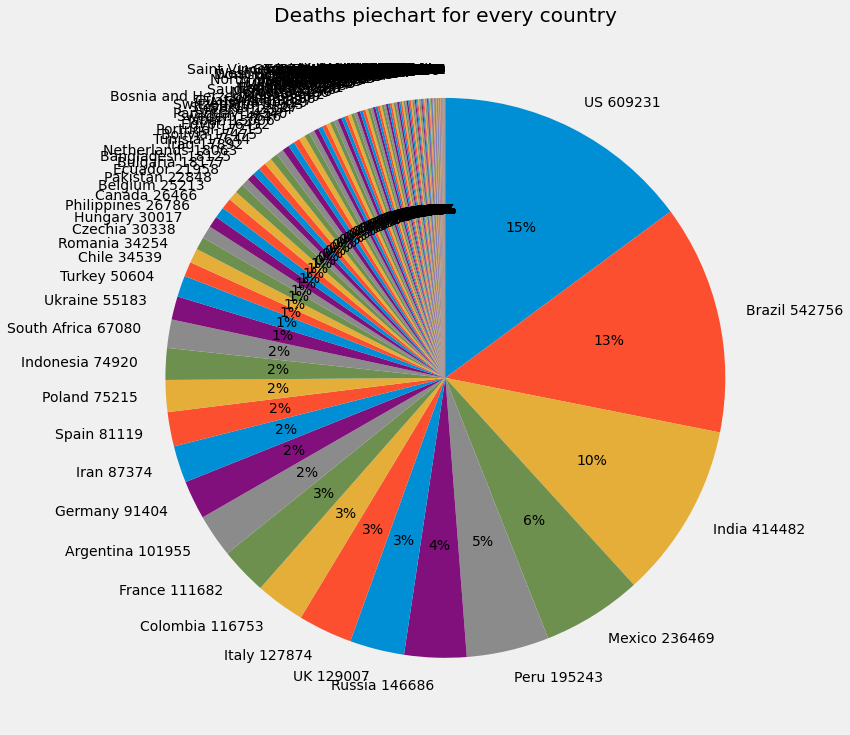

In [35]:
piechart('Deaths')

World total:  7855


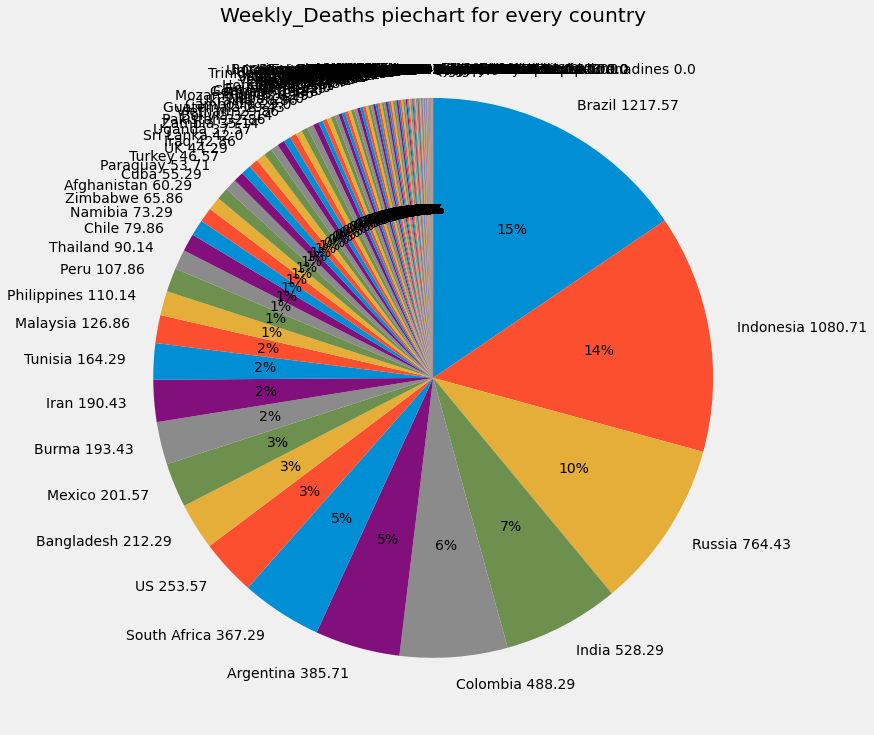

In [36]:
piechart('Weekly_Deaths')

World total:  7276


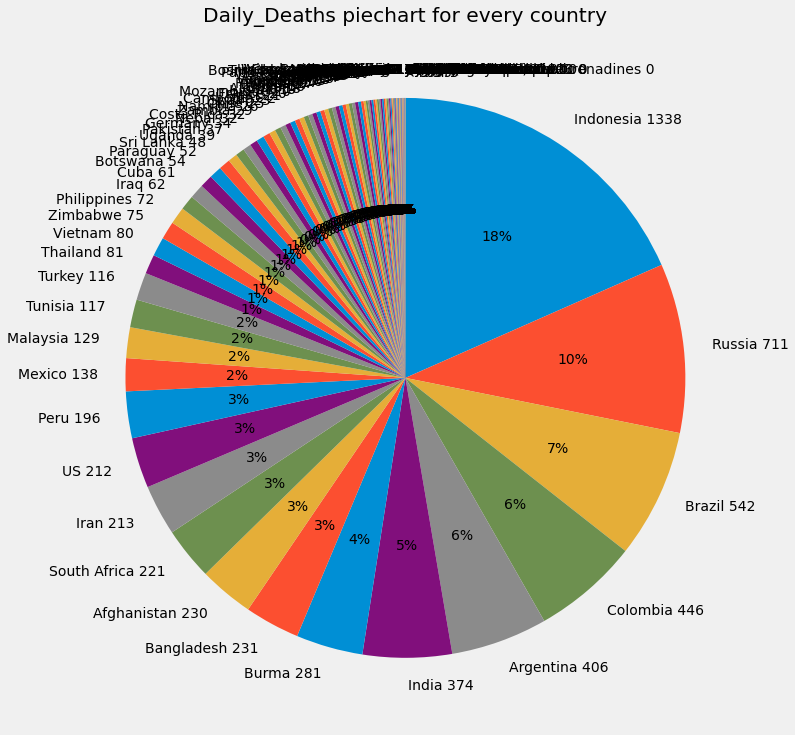

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-20


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

819228200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master b81b5e5] `date` update
 1 file changed, 657 insertions(+), 2124 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (99%)


To https://github.com/Arrowheadahp/COVID-19.git
   dce1ae4..b81b5e5  master -> master
